<h1>5. Einblick in andere Zeitreihenmodelle</h1>
<h4>Session 5 (Freitag 09:15 – 10:45)</h4>
<br>
5.1 Frequenzanalyse (Fourieranalyse) / Zustandsraumdarstellung (State-space models, Kalman-Filter): Ansatz, Pakete<br>
5.2 Praxisbeispiel additives Regressionsmodell mit Facebook Prophet<br>
5.3 Bsp: Stromverbrauch vorhersagen unter Berücksichtigung von Saisonalität, Wochen- und Feiertagen<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error,mean_squared_error

<h3>5.1 Frequenzanalyse (Fourieranalyse) von Zeitreihendaten</h3>

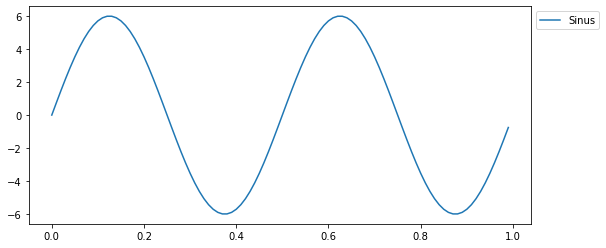

In [29]:
# Frequenzen, Amplituden, Abtastrate und Zeitbereich festlegen:
f1 =  2  # Frequency 1 in Hz
f2 = 10  # Frequency 2 in Hz
A1 = 6   # Amplitude 1
A2 = 2   # Amplitude 2
Fs = 100 # Sampling rate
t  = np.arange(0,1,1/Fs)

# Primzahlsignale berechnen:
A_sin = A1 * np.sin(2 * np.pi * f1 * t)
A_cos = A2 * np.cos(2 * np.pi * f2 * t)
A_signal = A_sin + A_cos

# etwas Rauschen hinzufügen:
np.random.seed(1)
A_Noise = 2
Noise = np.random.randn(len(t)) * A_Noise
A_signal_noisy = A_signal + Noise

# Plots:
fig=plt.figure(3, figsize=(9,4))
plt.clf()
plt.plot(t, A_sin, label="Sinus")
#plt.plot(t, A_cos, label="Cosinus")
#plt.plot(t, A_signal, label="Überlagerung")
#plt.plot(t, A_signal_noisy, label="Überlagerung + Rauschen")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

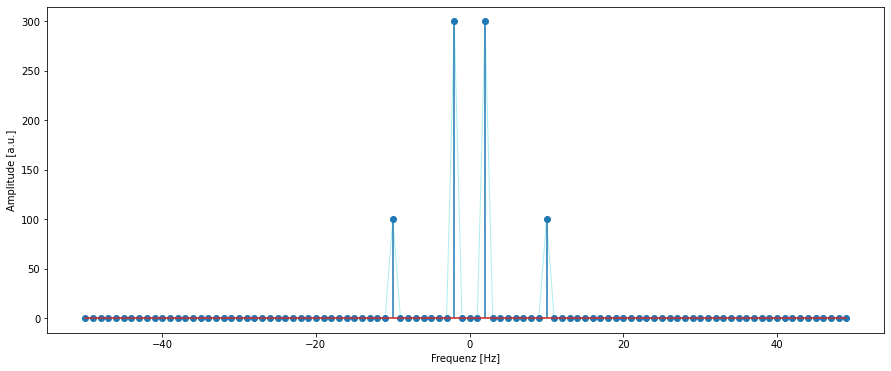

In [39]:
A_signal_fft = scipy.fft.fft(A_signal)
freq = scipy.fft.fftfreq(np.size(t), 1/Fs)

fig=plt.figure(2, figsize=(15,6))
plt.plot(freq, np.abs(A_signal_fft),lw=1.0, c='paleturquoise')
plt.stem(freq, np.abs(A_signal_fft))
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Amplitude [a.u.]");

<div class="alert alert-info">
- Erzeuge ein anderes Signal (durch Veränderung der Frequenzen, Amplituden, Abtastrate)<br>
- Wie verändert sich dein Plot der Überlagerung mit jeweiligen obigen Änderungen?<br>
- Führe eine FFT durch und plotte das Ergebnis wie oben<br>
- Wie verändert sich dein FFT Plot mit jeweiligen obigen Änderungen (Frequenzen, Amplituden, Abtastrate)?
</div>

<h3>5.2 Vorhersagen mit Facebook Prophet</h3>

<h3>Airline Data</h3>

In [2]:
airline = pd.read_csv('AirPassengers.csv')
airline.columns = ['ds','y']
airline['ds'] = pd.to_datetime(airline['ds'])
airline['ds'].freq = 'MS'
airline.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [3]:
airline.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


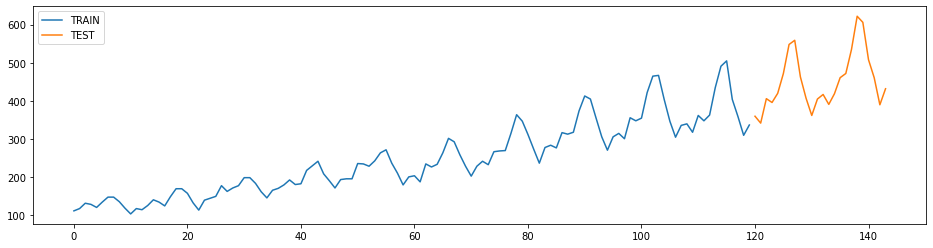

In [4]:
train_airline = airline[:120]
test_airline = airline[120:]
train_airline['y'].plot(legend=True,label='TRAIN')
test_airline['y'].plot(legend=True,label='TEST',figsize=(16,4));

In [5]:
model_air = Prophet()

In [ ]:
model_air.fit(train_airline)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\sinaa\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


KeyError: 'metric_file'

In [ ]:
future_air = model_air.make_future_dataframe(periods=12, freq = 'MS')

In [ ]:
pred_air = model_air.predict(future_air)
pred_air.tail()

In [ ]:
model_air.plot(pred_air);

In [ ]:
fig = plt.figure(figsize = (14,4))
ax = fig.add_subplot(111)

ax.plot(train_airline['ds'], train_airline['y'], label = 'TRAIN')
ax.plot(test_airline['ds'], test_airline['y'], label = 'TEST')
ax.plot(pred_air['ds'], pred_air['yhat'], label = 'PROPHET')
plt.legend(loc='upper left');
plt.show()

In [ ]:
y_tru = test_airline['y']
y_PROPHET = pred_air[120:]['yhat']
errors = [['Mean Absolute Error', 385.86, 72.57, mean_absolute_error(y_tru,y_PROPHET)], ['Mean Squared Error', 226554.12, 9229.94, mean_squared_error(y_tru,y_PROPHET)]] 
errors = pd.DataFrame(errors, columns = ['Art des Fehlers','Holt-Winters Vorhersage','SARIMA Vorhersage', 'Prophet Vorhersage']) 
errors.set_index('Art des Fehlers', inplace=True) 
errors = round(errors, 2)
errors 

<div class="alert alert-info">
- Wir sind gespannt: Wie schneidet Prophet bei unseren Stromverbrauchsdaten im Mai 2012 ab?<br>
- Nutze das Prophetmodell analog zum obigen Beispiel für eine Vorhersage<br>
- Plotte die Ergebnisse - wie sieht Vorhersage für dich aus?<br>
- Überprüfe anhand der bekannten Fehlermaße, wie Prophet im Vergleich zu unserem SARIMA-Modell abschneidet
</div>